In [ ]:
df_dir = "../data/dataframes/"

In [5]:
# Load fALFF & CV

fALFF_df = pd.read_csv(df_dir + "fALFF.csv", index_col=0)
cv_df = pd.read_csv(df_dir + "cv_df.csv", index_col=0)
subject_name_df = pd.read_csv(df_dir + "subject_name_df.csv")

In [9]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes for subjects (bipartite set 1)
B.add_nodes_from(fALFF_df.index, bipartite=0)

# Add nodes for regions (bipartite set 2)
regions = fALFF_df.columns.tolist()  # All regions are the columns of fALFF_df
B.add_nodes_from(regions, bipartite=1)

# Add edges between subjects and regions with two distinct weights (one from fALFF_df and one from cv_df)
for subject in fALFF_df.index:
    for region in fALFF_df.columns:
        weight1 = fALFF_df.at[subject, region]  # Weight from fALFF_df
        weight2 = cv_df.at[subject, region]  # Weight from cv_df
        
        # Add an edge with two distinct weights
        B.add_edge(subject, region, weight_fALFF=weight1, weight_cv=weight2)

# Now the graph B contains bipartite nodes (subjects and regions) with edges having two distinct weights

# Example: Print the edges with weights from both dataframes
for u, v, data in B.edges(data=True):
    print(f"Edge ({u}, {v}) - Weight from fALFF_df: {data['weight_fALFF']}, Weight from cv_df: {data['weight_cv']}")

Edge (sub-0270, Frontal Pole) - Weight from fALFF_df: 0.011413486129268, Weight from cv_df: 0.0073612039876769
Edge (sub-0270, Insular Cortex) - Weight from fALFF_df: 0.0109831041557219, Weight from cv_df: 0.004122707778398
Edge (sub-0270, Superior Frontal Gyrus) - Weight from fALFF_df: 0.0102534655674508, Weight from cv_df: 0.0033772814965019
Edge (sub-0270, Middle Frontal Gyrus) - Weight from fALFF_df: 0.0104705652801682, Weight from cv_df: 0.0035264782221146
Edge (sub-0270, Inferior Frontal Gyrus, pars triangularis) - Weight from fALFF_df: 0.0116310019624798, Weight from cv_df: 0.0041090143479253
Edge (sub-0270, Inferior Frontal Gyrus, pars opercularis) - Weight from fALFF_df: 0.0109332973013453, Weight from cv_df: 0.0045086828086869
Edge (sub-0270, Precentral Gyrus) - Weight from fALFF_df: 0.0112674114714192, Weight from cv_df: 0.0032867156447452
Edge (sub-0270, Temporal Pole) - Weight from fALFF_df: 0.0080581881626695, Weight from cv_df: 0.0064409777976852
Edge (sub-0270, Superior

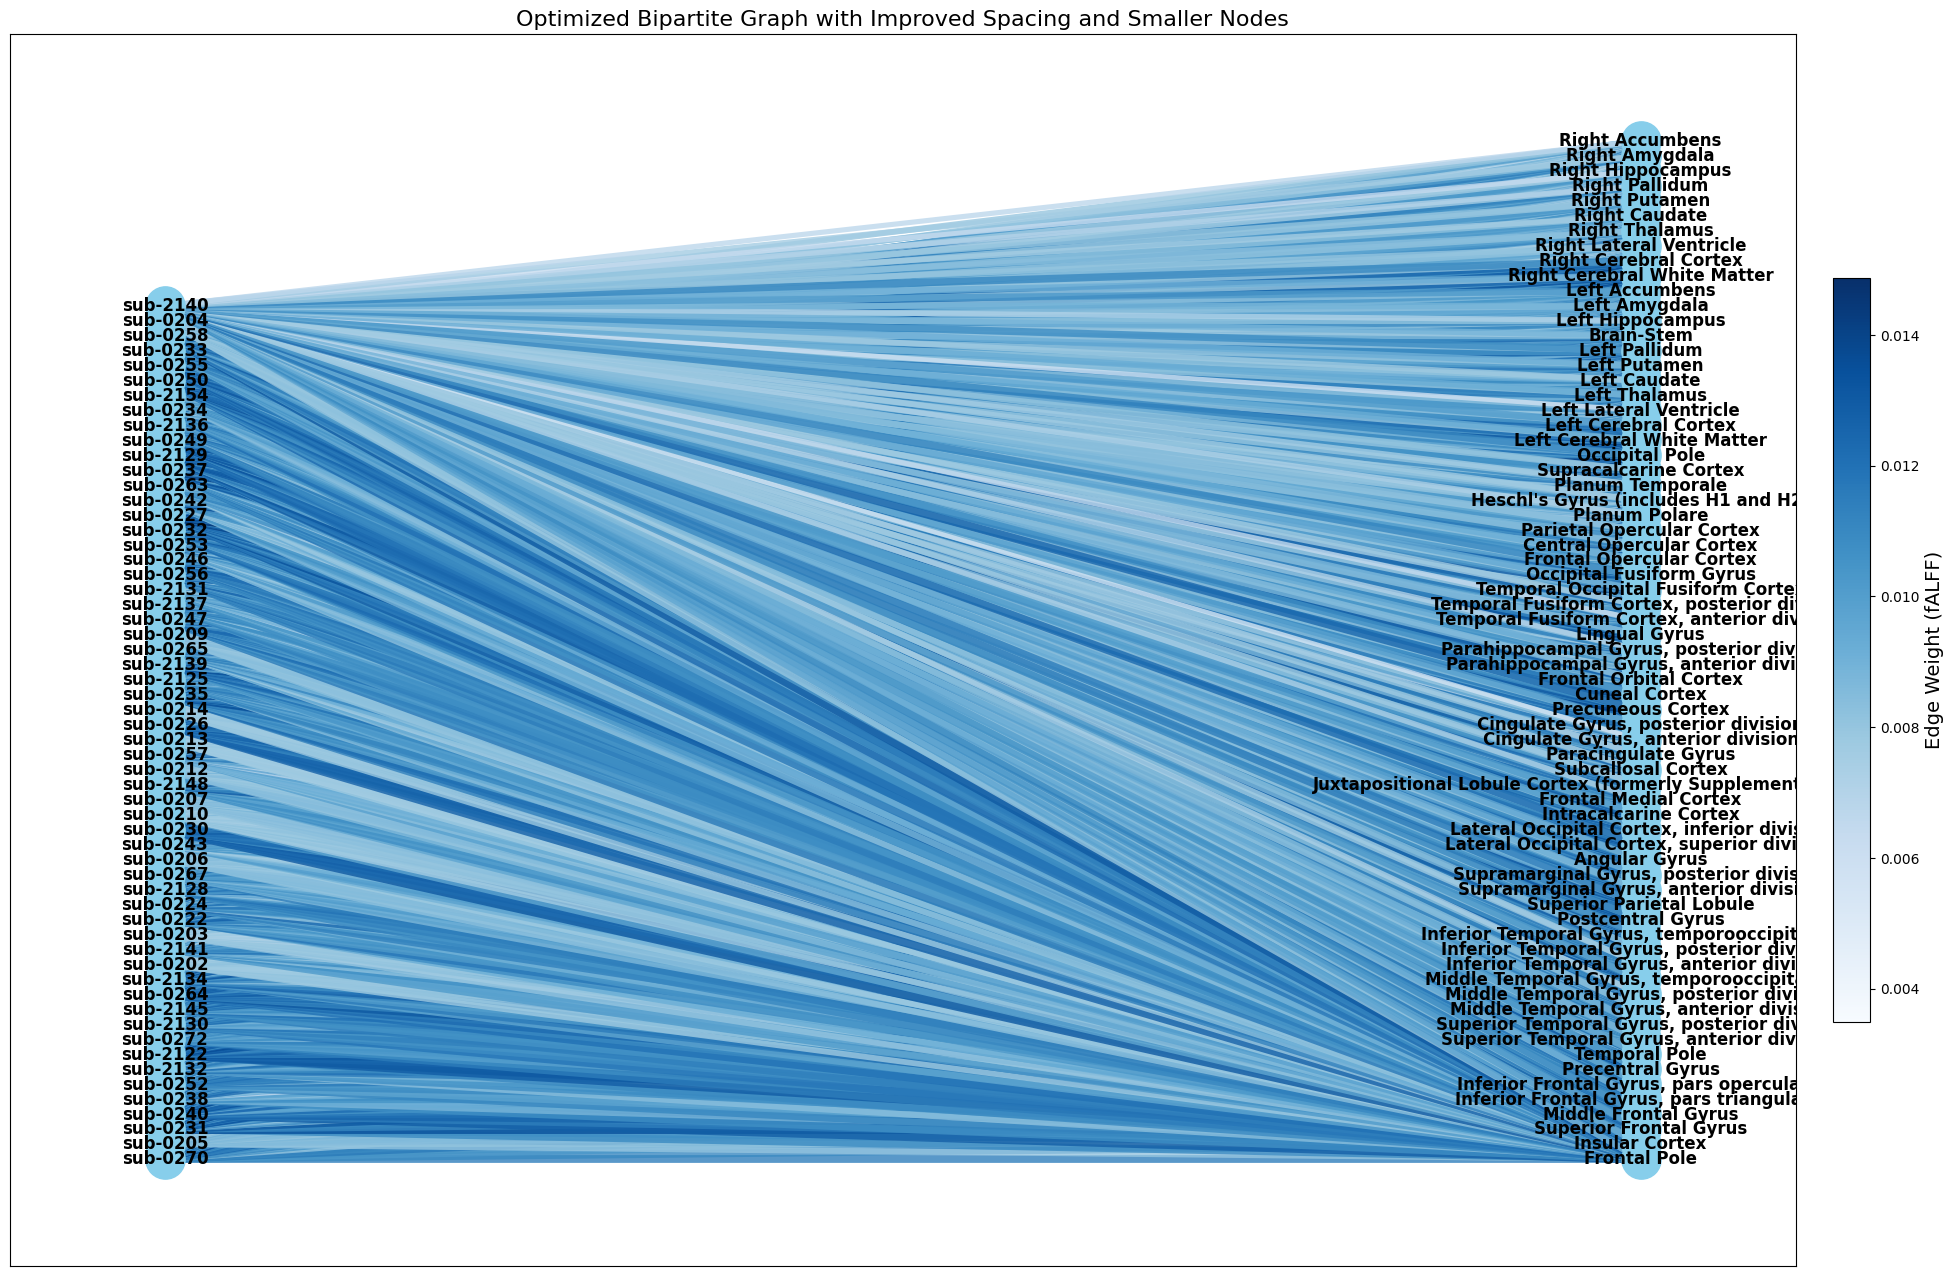

In [10]:
# Set positions for bipartite layout with increased spacing
pos = {}
pos.update((node, (1, index * 2.5)) for index, node in enumerate(fALFF_df.index))  # Subjects (left side)
pos.update((node, (4, index * 2.5)) for index, node in enumerate(regions))  # Regions (right side)

# Get edge weights from the fALFF_df's weight column
edge_weights = [B[u][v]['weight_fALFF'] for u, v in B.edges()]

# Normalize edge thickness for better visibility
max_weight = max(edge_weights) if edge_weights else 1  # Avoid division by zero
edge_widths = [1 + 6 * (w / max_weight) for w in edge_weights]  # Scale thickness between 1 and 7

# Normalize edge color mapping
norm = mcolors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
cmap = cm.Blues
edge_colors = [cmap(norm(w)) for w in edge_weights]

# Set larger figure size
plt.figure(figsize=(24, 16))  # Bigger canvas for better visibility

# Draw the bipartite graph with smaller nodes
edges = nx.draw_networkx_edges(
    B, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=cmap, alpha=0.8
)
nodes = nx.draw_networkx_nodes(B, pos, node_size=800, node_color='skyblue')  # Smaller nodes
labels = nx.draw_networkx_labels(B, pos, font_size=12, font_weight='bold')

# Add colorbar legend for edge weights
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label("Edge Weight (fALFF)", fontsize=14)

# Title
plt.title("Optimized Bipartite Graph with Improved Spacing and Smaller Nodes", fontsize=16)

# Show the plot
plt.show()


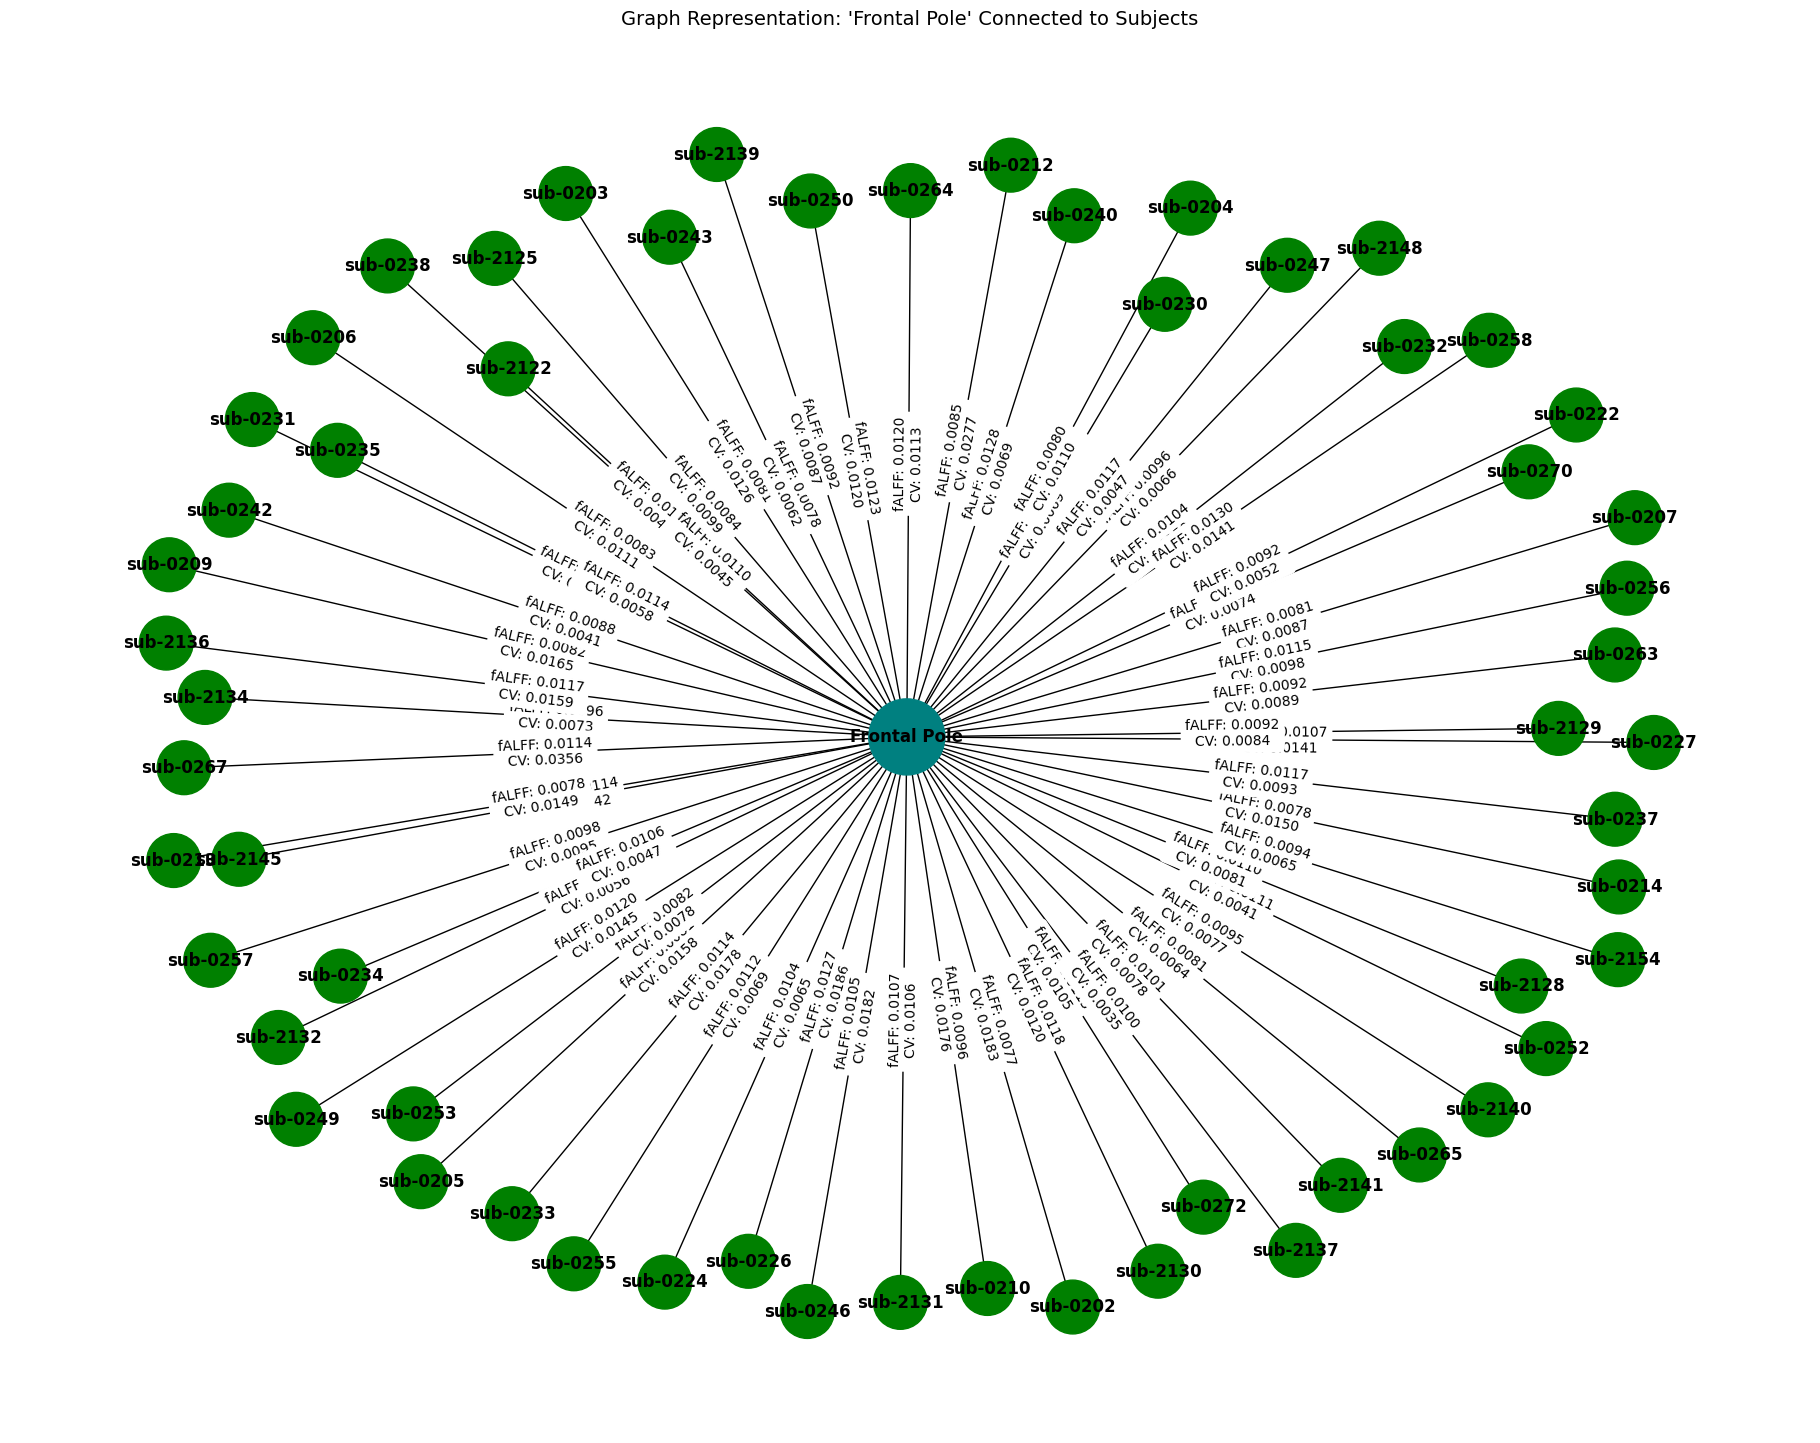

In [11]:
# Select the region to visualize
region_to_visualize = "Frontal Pole"

# Create an empty graph
B = nx.Graph()

# Add the central brain region node
B.add_node(region_to_visualize, color='Teal', size=3000)

# Add subject nodes and edges
for subject in fALFF_df.index:
    weight1 = fALFF_df.at[subject, region_to_visualize]  # fALFF weight
    weight2 = cv_df.at[subject, region_to_visualize] if region_to_visualize in cv_df.columns else 0  # CV weight
    
    B.add_node(subject, color='green', size=1500)  # Subject nodes
    B.add_edge(subject, region_to_visualize, weight1=weight1, weight2=weight2)  # Edge with weights

# Set figure size **before drawing**
plt.figure(figsize=(18, 14))  # Larger figure size for better visibility

# Positioning: Use `spring_layout` with a **higher `k` value** to spread nodes more
pos = nx.spring_layout(B, seed=42, k=1.5)  # Increase k for wider spacing

# Draw nodes with custom sizes and colors
node_colors = [B.nodes[node]['color'] for node in B.nodes()]
node_sizes = [B.nodes[node]['size'] for node in B.nodes()]
nx.draw(B, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=12, font_weight='bold')

# Draw edges with labels (4 decimal places)
edge_labels = {
    (u, v): f"fALFF: {B[u][v]['weight1']:.4f}\nCV: {B[u][v]['weight2']:.4f}" 
    for u, v in B.edges()
}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_size=10)

# Title
plt.title(f"Graph Representation: '{region_to_visualize}' Connected to Subjects", fontsize=14)

# Show the plot
plt.show()
